# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [60]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')

df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [62]:
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [64]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [66]:
df_2 = df[['posse_de_veiculo','posse_de_imovel','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]

In [68]:
# Matriz de correlação

df_2.corr( )

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


É possível observar que a variável que apresenta maior relação com renda é tempo_emprego, com um índice de correlação de 39%, enquanto as demais variáveis não ultrapassam 1%.

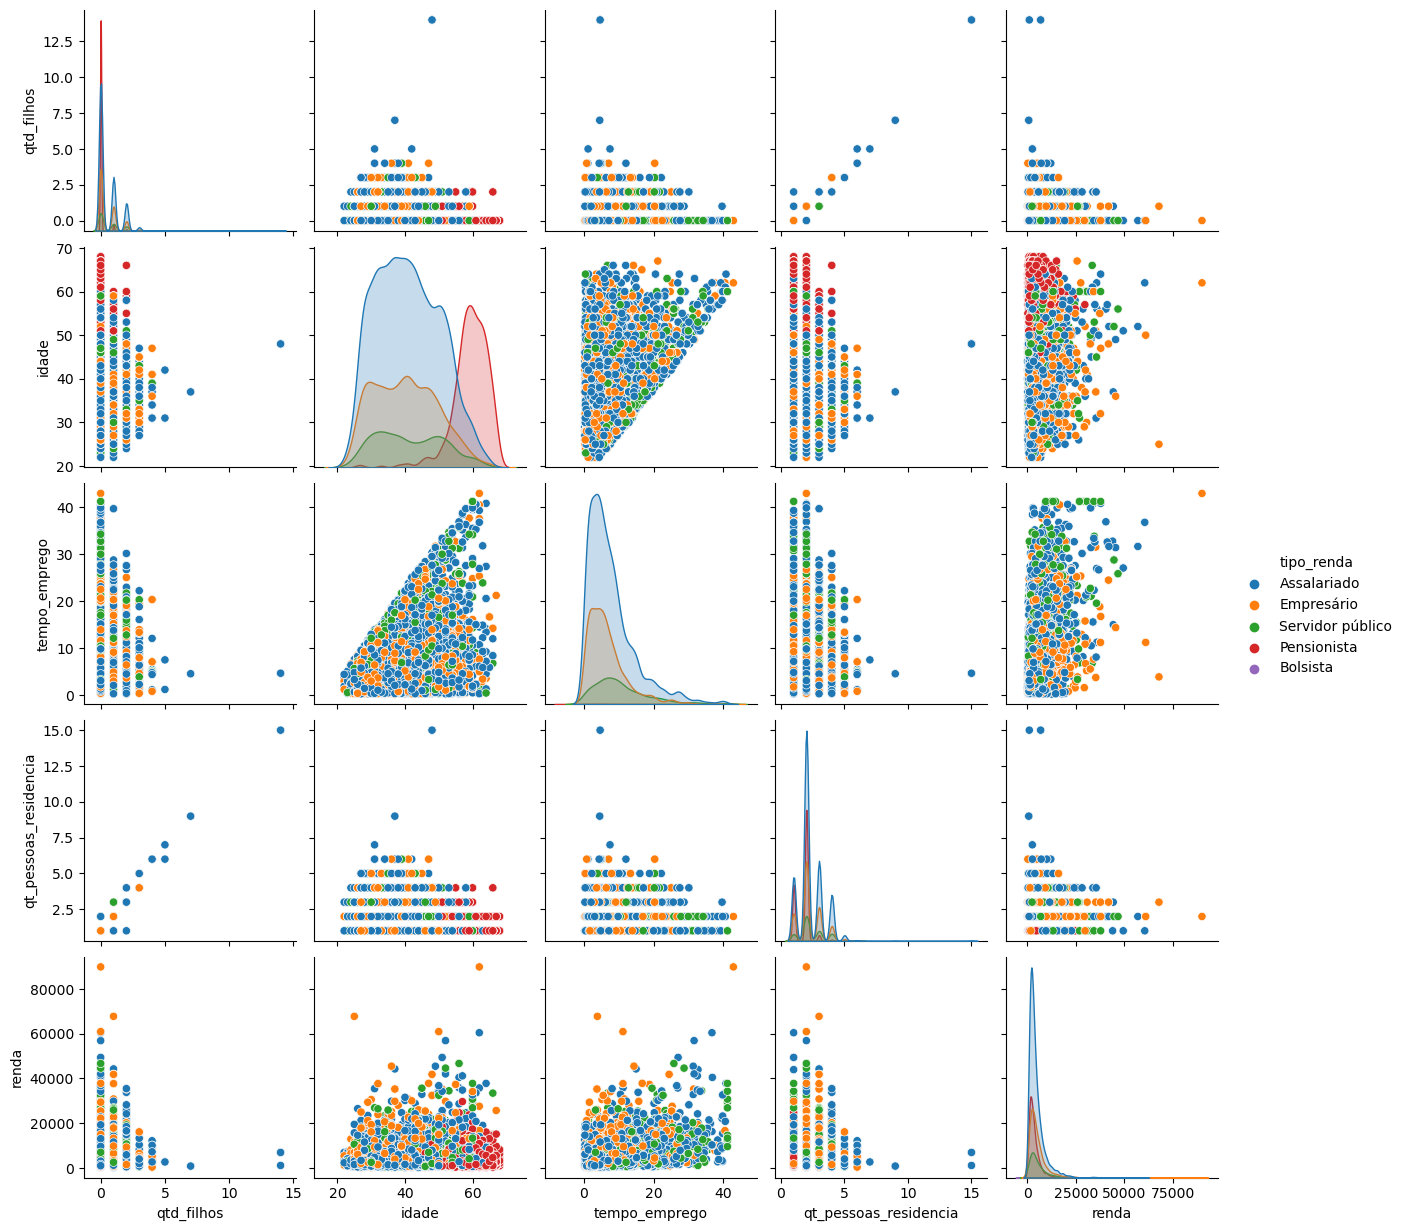

In [70]:
# Matriz de dispersão

sns.pairplot(data=df, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'])

plt.show()

Ao analisar o "pairplot" , que consiste na matriz de dispersão, é possível identificar *outliers* na variável "renda" associados principalmente aos clientes com renda empresarial, os quais podem afetar o resultado da análise de tendência, apesar de ocorrerem com baixa frequência. Também pode-se perceber uma relação entre idades mais avançadas e rendas mais baixas etre os pensionistas.

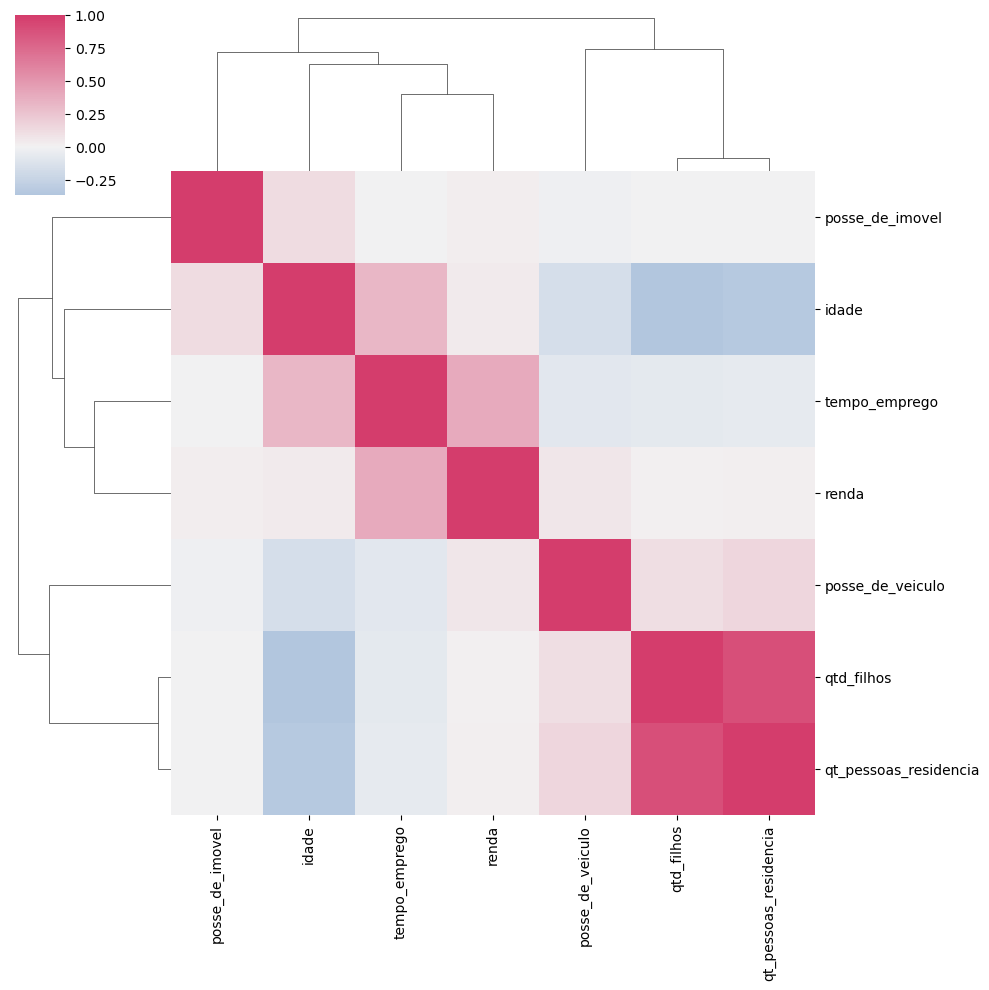

In [123]:
# Clustermap

cmap = sns.diverging_palette(h_neg=250, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1)
sns.clustermap(data=df_2.corr(), 
               figsize=(10, 10), 
               center=0, 
               cmap=cmap)

plt.show()

Com o clustermap, é possível reforçar novamente os resultados de baixa correlação com a variável "renda". Apenas a variável "tempo_emprego" apresenta um índice considerável para análise. Além disso, foram apresentadas duas variáveis booleanas, "posse_de_imovel" e "posse_de_veiculo", mas que também possuem baixo índice de correlação com "renda".

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

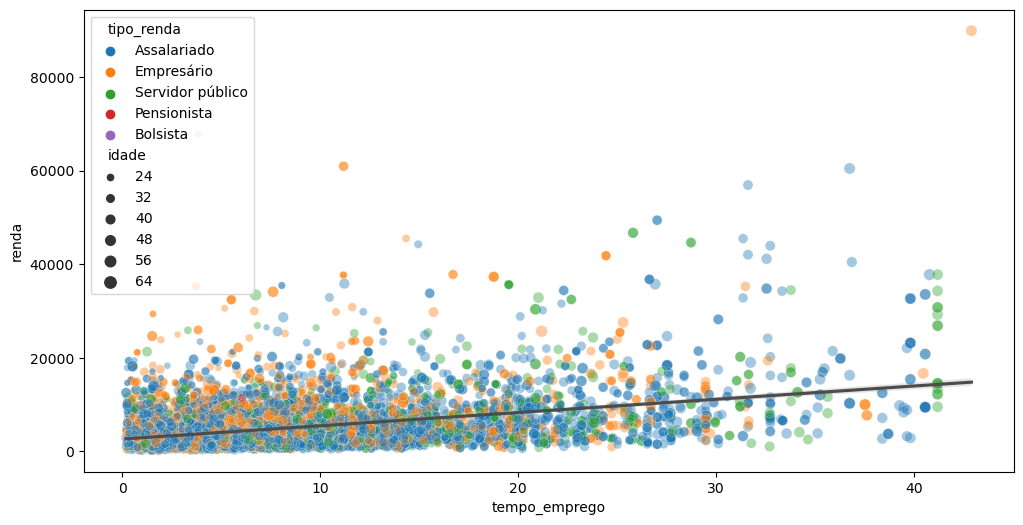

In [131]:
plt.figure(figsize=(12,6))

sns.scatterplot(x='tempo_emprego',
                y='renda', 
                hue='tipo_renda', 
                size='idade',
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', y='renda', data=df_2, scatter=False, color='.3')

plt.show()

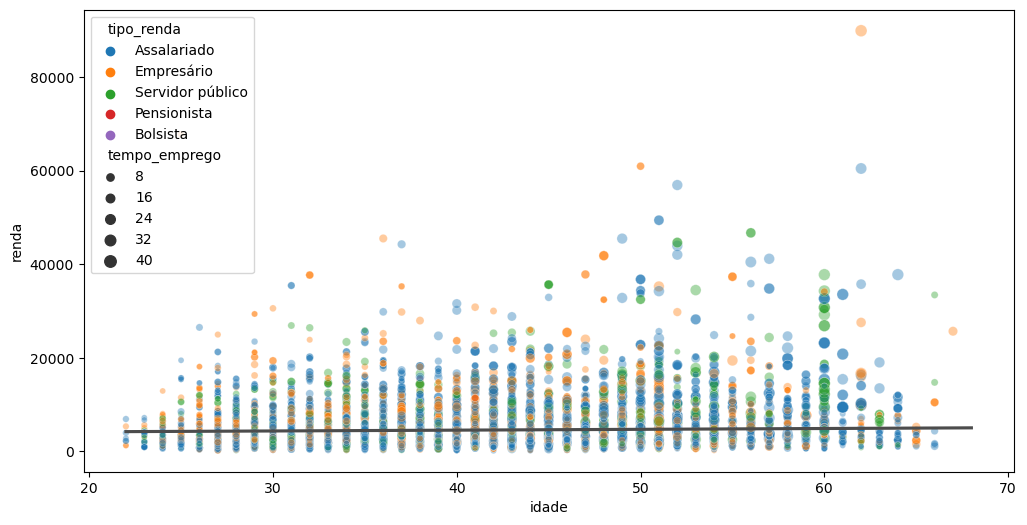

In [135]:
plt.figure(figsize=(12,6))

sns.scatterplot(x='idade', 
                y='renda', 
                hue='tipo_renda', 
                size='tempo_emprego', 
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', y='renda', data=df_2, scatter=False, color='.3')

plt.show()

Embora a correlação entre a variável tempo_emprego e a variável renda não seja tão alta, é possível identificar facilmente a covariância com a inclinação da linha de tendência. Por outro lado, a variável idade, que apresentou a segunda maior correlação, possui uma inclinação praticamente imperceptível.

3) Na sua opinião, há outliers na variável renda?

Sim, mas devido à baixa incidência, é possível que esses outliers não afetem significativamente os resultados de tendência.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

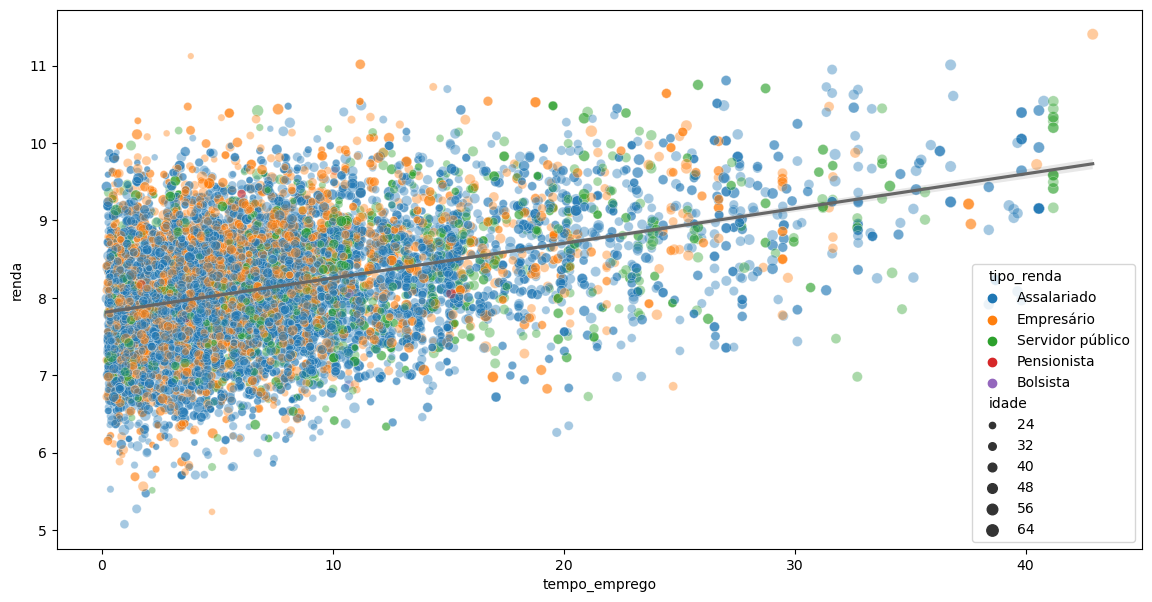

In [114]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(14,7))

sns.scatterplot(x='tempo_emprego',
                y='renda', 
                hue='tipo_renda', 
                size='idade',
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='0.4')

plt.show()

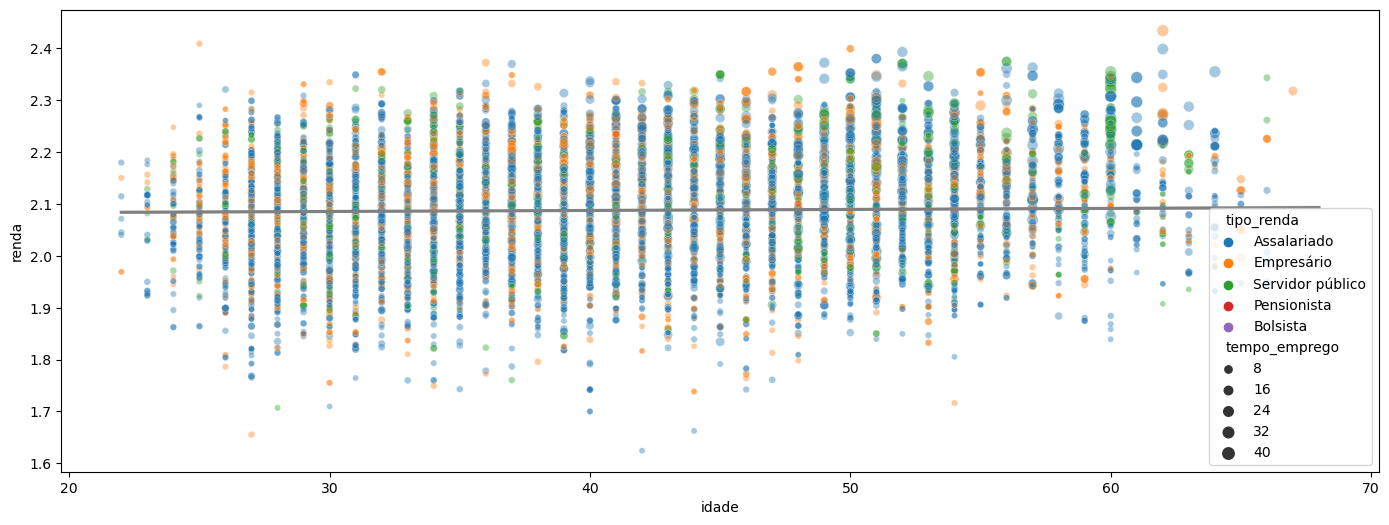

In [116]:

df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(17,6))

sns.scatterplot(x='idade', 
                y='renda', 
                hue='tipo_renda', 
                size='tempo_emprego',
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='0.5')

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [120]:
# Diferença após aplicação do LOG:
df_log_2 = np.log(df_2)
pd.concat(objs=[df_2.corr().tail(1), 
                df_log_2.corr().tail(1)], 
          axis=0
         ).reset_index(drop=True).rename(index={0:'renda', 
                                                1:'renda_log'})

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.0
renda_log,NaN,NaN,0.055807,0.034649,0.317140,0.037219,1.0


Nota-se com a matriz de correlação que a aplicação do "log" fez com que alterasse a correlação entre as variáveis, sendo que algumas aumentaram e outras diminuíram, enquanto visualmente, a análise melhorou principalmente na correlação entre "renda" e "tempo_emprego". 